In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Collaberative Filtering Model for Recommendation

**Objective**:

Use the given data to develop a collaborative filtering model for recommendation and 
use that to recommend other places to visit using the current tourist location(place name.

**Problem Statement:**

This project requires you to perform exploratory data analysis 
and develop a recommendation engine that will help tourists visit their places of interest.)

In [ ]:
# Importing datasets to python environment
print("RATINGS DATASET")
rating = pd.read_csv("tourism_rating.csv")
print(rating.head(5))
print("The shape of ratings dataset is :",rating.shape)

print("TOURISTS DATASET")
user = pd.read_csv("user.csv")
print(user.head(5))
print("The shape of tourists dataset is :",user.shape)

print("DESTINATION DATASET")
dest = pd.read_excel("tourism_with_id.xlsx")
print(dest.head(5))
print("The shape of destinations dataset is :",dest.shape)

RATINGS DATASET
   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
The shape of ratings dataset is : (10000, 3)
TOURISTS DATASET
   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20
The shape of tourists dataset is : (300, 3)
DESTINATION DATASET
   Place_Id                         Place_Name  \
0         1                   Monumen Nasional   
1         2                           Kota Tua   
2         3                      Dunia Fantasi   
3         4  Taman Mini Indonesia Indah (TMII)   
4         5           Atlantis Water Adventure   

                                         Description       Category     City  \
0  

In [ ]:
#Printing the basic information about the datasets
print("Basic information of rating :")
print(rating.info())

print("Basic information of user :")
print(user.info())

print("Basic information of dest :")
print(dest.info())

Basic information of rating :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None
Basic information of user :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None
Basic information of dest :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_I

The dtype of Time_Minutes is float.

In [ ]:
# checking for null values in datasets
print("Null values in rating :")
print(rating.isnull().sum())

print("Null values in user :")
print(user.isnull().sum())

print("Null values in dest :")
print(dest.isnull().sum())

Null values in rating :
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64
Null values in user :
User_Id     0
Location    0
Age         0
dtype: int64
Null values in dest :
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64


There are no null values in rating and user. In dest dataset there are null values in Time_Minutes. Unnamed:11 and Unnamed:12 must be dropped.

In [ ]:
#Dropping unnecessary columns
dest.drop(["Unnamed: 11","Unnamed: 12"],axis=1,inplace=True)

In [ ]:
# Printing the unique values and it's count
def unq_val(data):

    for col in data.columns:
        vc=data[col].value_counts()
        vc=pd.DataFrame(vc)
        print(col,vc)

# ratings
unq_val(rating)

#user
unq_val(user)

#dest
unq_val(dest)

User_Id          count
User_Id       
267         53
276         50
143         47
40          47
142         46
...        ...
275         23
48          22
21          22
151         22
60          21

[300 rows x 1 columns]
Place_Id           count
Place_Id       
177          39
298          39
437          38
201          37
208          36
...         ...
394          13
72           13
124          13
51           12
175          12

[437 rows x 1 columns]
Place_Ratings                count
Place_Ratings       
4               2106
3               2096
2               2071
5               2021
1               1706
User_Id          count
User_Id       
1            1
207          1
205          1
204          1
203          1
...        ...
100          1
99           1
98           1
97           1
300          1

[300 rows x 1 columns]
Location                               count
Location                           
Bekasi, Jawa Barat               39
Semarang, Jawa Tengah      

In the given datasets there is information about 300 users and 437 locations belonging to 6 categories. So far didn't found any discrepancy in data.

In [ ]:
# Basic statistical analysis of datasets
print("Statistical analysis of place ratings in rating dataset ")
print(rating['Place_Ratings'].describe().T)

print("Statistical analysis of age in user dataset ")
print(user['Age'].describe().T)

print("Statistical analysis of dest dataset ")
print("Numerical columns : \n ",dest[["Price","Time_Minutes"]].describe())
print("Categorical Columns : \n ",dest[["Place_Name","Category","City"]].describe())

Statistical analysis of place ratings in rating dataset 
count    10000.000000
mean         3.066500
std          1.379952
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Place_Ratings, dtype: float64
Statistical analysis of age in user dataset 
count    300.000000
mean      28.700000
std        6.393716
min       18.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       40.000000
Name: Age, dtype: float64
Statistical analysis of dest dataset 
Numerical columns : 
                 Price  Time_Minutes
count     437.000000    205.000000
mean    24652.173913     82.609756
std     66446.374709     52.872339
min         0.000000     10.000000
25%         0.000000     45.000000
50%      5000.000000     60.000000
75%     20000.000000    120.000000
max    900000.000000    360.000000
Categorical Columns : 
                Place_Name       Category        City
count                437            437        

From the above analysis it's clear that:
- Place ratings range is from 1-5. Most of the places have high ratings
- The maximum age of tourist who gave the ratings and review is 40. Most of the tourists are from the rnge 30-40.
- The range of price for destinations is quite high.
- Need to analyse more about the minimum value zero in price
- There are destinations where the tourists spent only 10 minutes. Maximum time spent is 6 hrs.
- The most frequent tourists destination is Monumen Nasional.
- Most of the tourist chose destinations belonging to Taman Hiburan category.
- The city that most tourists visited is Yogyakarta.

In [ ]:
# Checking if there are any duplicates in datasets
print("Number of duplicate records in rating dataset : ",rating.duplicated().sum())
print("Number of duplicate records in user dataset : ",user.duplicated().sum())
print("Number of duplicate records in dest dataset : ",dest.duplicated().sum())

Number of duplicate records in rating dataset :  79
Number of duplicate records in user dataset :  0
Number of duplicate records in dest dataset :  0


In [ ]:
#Analysing duplicates in rating
rating[rating.duplicated(keep=False)]

,User_Id,Place_Id,Place_Ratings
25,1,328,2
29,1,328,2
120,5,321,3
129,5,321,3
134,5,301,2
...,...,...,...
9690,291,431,4
9807,295,403,1
9814,295,403,1
9855,296,177,4


In [ ]:
#Dropping duplicates
rating.drop_duplicates(keep='first',inplace=True)

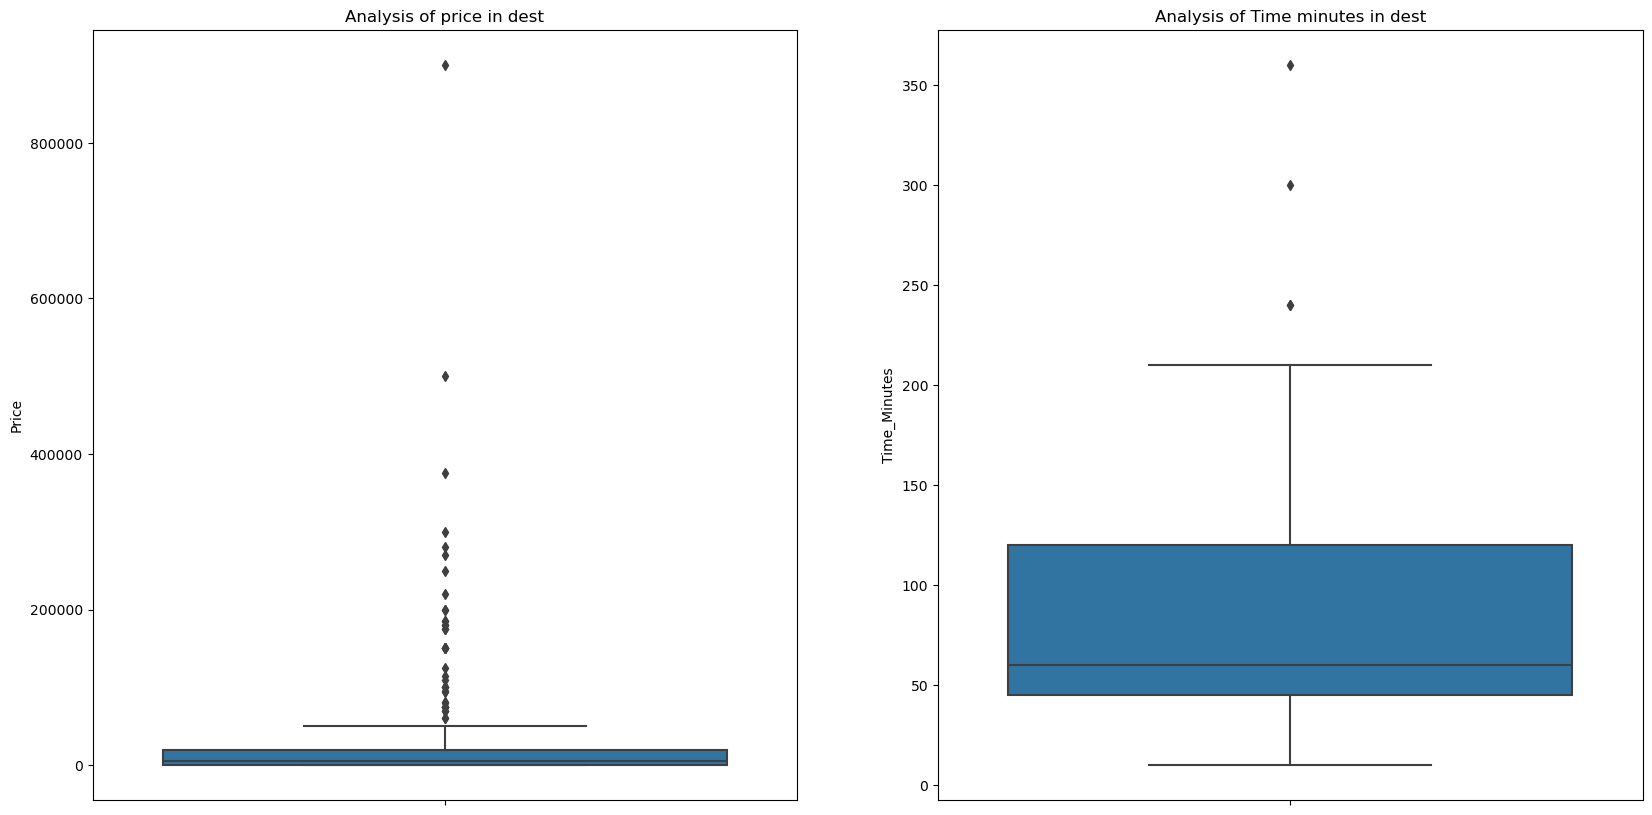

In [ ]:
# Outlier detection
fig=plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(y='Price',data=dest);
plt.title('Analysis of price in dest')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(y='Time_Minutes',data=dest);
plt.title('Analysis of Time minutes in dest');

Time minutes have null values in it and Price have zeros. For both columns the outliers are above the maximum.Hence we can use capping technique to treat outliers,

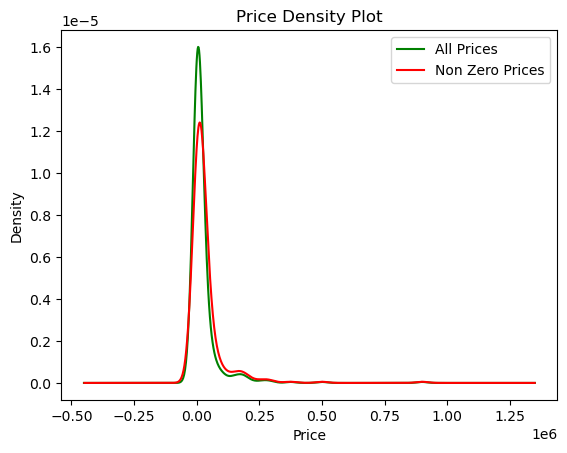

In [ ]:
#plotting density for Price with and without considering 0
non_zero_prices = dest[dest['Price'] != 0]
dest.Price.plot.density(color='green',label ="All Prices")
non_zero_prices.Price.plot.density(color='Red',label="Non Zero Prices")
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Density Plot')
plt.legend();

The zero values in price may be are null values. Zero price have all listed city and category in it.Need further analysis before finalizing. The distribution is right skewed.

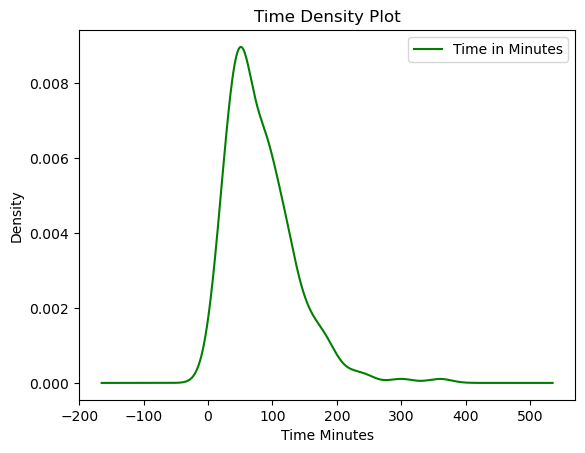

In [ ]:
#plotting density for Time minutes
dest.Time_Minutes.plot.density(color='green',label ="Time in Minutes")
plt.xlabel('Time Minutes')
plt.ylabel('Density')
plt.title('Time Density Plot')
plt.legend();

The distribution of time minutes is also right skewed.

In [ ]:
# treating outliers in Price
multiplier=1.5
Q1 = np.percentile(dest['Price'], 25, interpolation='midpoint')
Q3 = np.percentile(dest['Price'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - multiplier * IQR
up_lim = min(Q3 + multiplier * IQR, dest['Price'].max())
up_lim_extm = dest.Price.quantile(0.75) + (IQR * 3)
print( "The Upper limit and Upper limit extrem Are : " ,up_lim, up_lim_extm)
print('Number of records having value greater than up_lim_extm: {}'.format(dest[dest.Price>up_lim_extm].shape[0]))
# Capping outliers with upper lim extreme values
dest.loc[dest.Price>up_lim_extm,'Price'] = up_lim_extm
dest.Price.max()

The Upper limit and Upper limit extrem Are :  50000.0 80000.0
Number of records having value greater than up_lim_extm: 30


80000

In [ ]:
#Analysing outliers in Time_minutes
dest_notnull =dest[dest['Time_Minutes'].notnull()]
Q1 = np.percentile(dest_notnull['Time_Minutes'], 25, interpolation='midpoint')
Q3 = np.percentile(dest_notnull['Time_Minutes'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - multiplier * IQR
up_lim = min(Q3 + multiplier * IQR, dest_notnull['Time_Minutes'].max())
up_lim_extm = dest_notnull.Time_Minutes.quantile(0.75) + (IQR * 3)
print( "The Upper limit and Upper limit extrem Are : " ,up_lim, up_lim_extm)
print('Number of records having value greater than up_lim_extm: {}'.format(dest_notnull[dest_notnull.Time_Minutes>up_lim].shape[0]))
# Capping outliers with upper lim values
dest.loc[dest.Time_Minutes>up_lim,'Time_Minutes'] = up_lim
dest.Time_Minutes.max()

The Upper limit and Upper limit extrem Are :  232.5 345.0
Number of records having value greater than up_lim_extm: 4


232.5

In [ ]:
#Treating missing values in Time Minutes
#The median is the better choice for imputing missing values for right skewed distribution.
# Group by 'Category' and 'City', then fill missing values with the median of each group.
dest['Time_Minutes'] = dest.groupby(['City','Category' ])['Time_Minutes'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# If still there are null values
if dest['Time_Minutes'].isna().sum() > 0:
    global_median = dest['Time_Minutes'].median()
    dest['Time_Minutes'] = dest['Time_Minutes'].fillna(global_median)

In [ ]:
# Normalizing  time minutes
#Using natural log tranform for time minutes because of the range and nature of values
dest['Time_Minutes']  = np.log(dest['Time_Minutes'] )

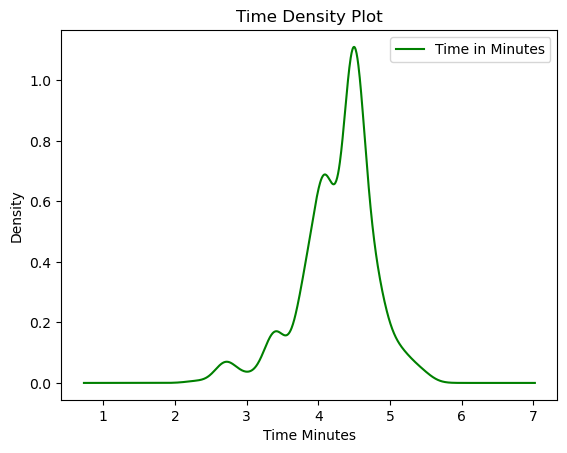

In [ ]:
#plotting density for Time minutes after normalizing
dest.Time_Minutes.plot.density(color='green',label ="Time in Minutes")
plt.xlabel('Time Minutes')
plt.ylabel('Density')
plt.title('Time Density Plot')
plt.legend();

In [ ]:
#merging dest, user and items datasets
merged_data = pd.merge(dest,rating, how='outer')
merged_data = pd.merge(merged_data,user, how='outer')
merged_data.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,User_Id,Place_Ratings,Location,Age
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,2.708050,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,36,4,"Solo, Jawa Tengah",20
1,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,4.787492,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,36,2,"Solo, Jawa Tengah",20
2,23,Gereja Katedral,"Gereja Katedral Jakarta, atau bernama resmi Ge...",Tempat Ibadah,Jakarta,0,4.8,4.499810,"{'lat': -6.169225000000001, 'lng': 106.833063}",-6.169225,106.833063,36,5,"Solo, Jawa Tengah",20
3,24,Museum Nasional,Museum Nasional Republik Indonesia atau Museum...,Budaya,Jakarta,5000,4.6,4.499810,"{'lat': -6.176402099999999, 'lng': 106.8215901}",-6.176402,106.821590,36,3,"Solo, Jawa Tengah",20
4,32,Setu Babakan,Setu Babakan atau Danau Babakan terletak di Sr...,Budaya,Jakarta,0,4.4,4.499810,"{'lat': -6.341666699999999, 'lng': 106.8238889}",-6.341667,106.823889,36,5,"Solo, Jawa Tengah",20


In [ ]:
#Dropping few columns defore further analysis
merged_data.drop(['Description','Coordinate', 'Lat', 'Long'],axis=1,inplace=True)

## Exploratory Data Analysis

In [ ]:
df = merged_data

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


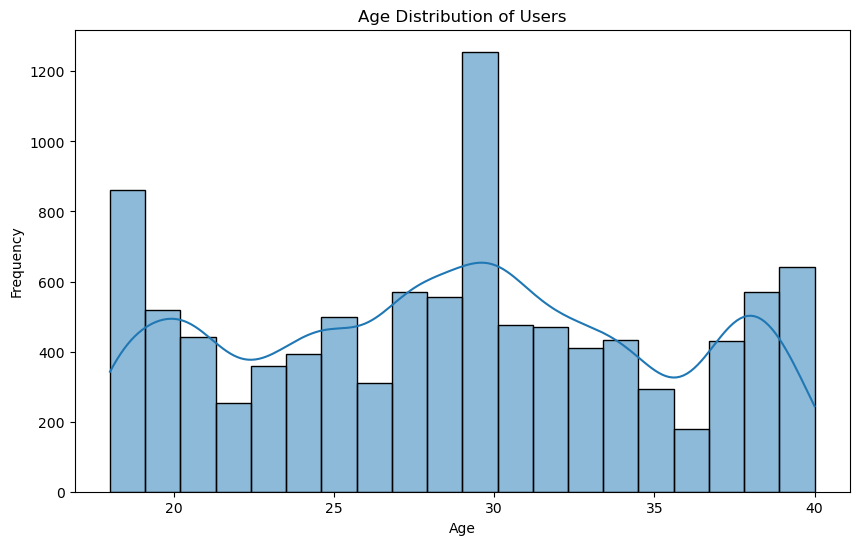

In [ ]:
# I. Analyze the age distribution of users visiting the places and rating them
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Observations
- Most of the tourists are from age category 30
- Second most tourists are from 18 years category
- There is dip in number of tourists from 20 to late 20's.
- The number of tourists reaches its minimum at 36, decreasing from 30.
- The number of tourists increases after 36

In [ ]:
#Detailed analysis of each age category
age_20= df[df['Age']<=20]
age_30= df[df['Age']<=30]
age_40= df[df['Age']<=40]

In [ ]:
# different categories in each city visited by tourists in age <= 20 category
age_20.groupby(['Category','City'])['User_Id'].count()

Category            City      
Bahari              Jakarta        28
                    Semarang       19
                    Surabaya        3
                    Yogyakarta    108
Budaya              Bandung        68
                    Jakarta       103
                    Semarang       51
                    Surabaya       50
                    Yogyakarta     95
Cagar Alam          Bandung       170
                    Jakarta        11
                    Semarang       58
                    Surabaya       15
                    Yogyakarta     66
Pusat Perbelanjaan  Bandung         3
                    Jakarta        43
                    Surabaya        4
                    Yogyakarta     10
Taman Hiburan       Bandung       118
                    Jakarta        95
                    Semarang       45
                    Surabaya       60
                    Yogyakarta    104
Tempat Ibadah       Bandung        26
                    Jakarta         8
                   

- Most people in this category visited cagar alam
- Least visited category is Tempat Ibadah
- Most popular city among this category of tourists are Yogyakarta and Bandung

In [ ]:
# different categories in each city visited by tourists in age <= 30 category
age_30.groupby(['Category','City'])['User_Id'].count()

Category            City      
Bahari              Jakarta       107
                    Semarang       63
                    Surabaya       15
                    Yogyakarta    466
Budaya              Bandung       324
                    Jakarta       431
                    Semarang      222
                    Surabaya      238
                    Yogyakarta    412
Cagar Alam          Bandung       749
                    Jakarta        38
                    Semarang      277
                    Surabaya       67
                    Yogyakarta    315
Pusat Perbelanjaan  Bandung        12
                    Jakarta       158
                    Surabaya       19
                    Yogyakarta     48
Taman Hiburan       Bandung       528
                    Jakarta       363
                    Semarang      204
                    Surabaya      247
                    Yogyakarta    477
Tempat Ibadah       Bandung       104
                    Jakarta        47
                   

- Most people in this category visited Taman Hiburan
- second most popular category is Budaya
- Least visited category is Tempat Ibadah
- Most popular city among this category of tourists are Yogyakarta and Bandung

In [ ]:
# different categories in each city visited by tourists in age <= 40 category
age_40.groupby(['Category','City'])['User_Id'].count()

Category            City      
Bahari              Jakarta        168
                    Semarang        99
                    Surabaya        26
                    Yogyakarta     779
Budaya              Bandung        529
                    Jakarta        719
                    Semarang       349
                    Surabaya       402
                    Yogyakarta     666
Cagar Alam          Bandung       1230
                    Jakarta         75
                    Semarang       456
                    Surabaya       111
                    Yogyakarta     525
Pusat Perbelanjaan  Bandung         21
                    Jakarta        251
                    Surabaya        32
                    Yogyakarta      77
Taman Hiburan       Bandung        861
                    Jakarta        614
                    Semarang       352
                    Surabaya       396
                    Yogyakarta     801
Tempat Ibadah       Bandung        181
                    Jakarta      

-Most people in this category visited Budaya
-
Least visited category is Tempat Ibada_h
Most popular city among this category of tourists are Yogyakarta and Bandung

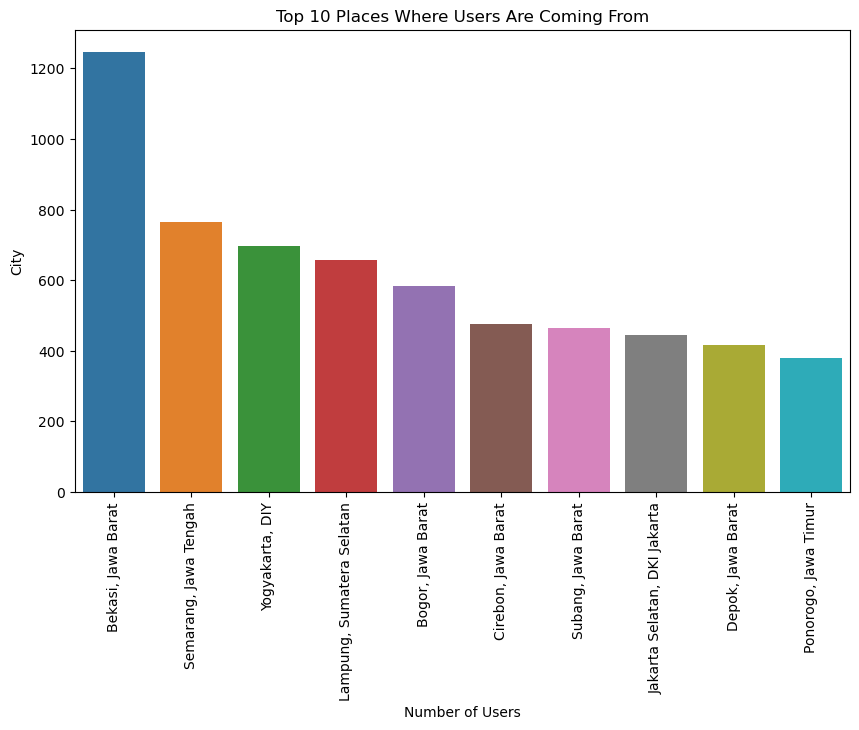

In [ ]:
# II. Identify the places where most of these users (tourists) are coming from
plt.figure(figsize=(10, 6))
top_cities = df['Location'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Places Where Users Are Coming From')
plt.xlabel('Number of Users')
plt.xticks(rotation=90)
plt.ylabel('City')
plt.show()

In [ ]:
top_cities

Location
Bekasi, Jawa Barat              1247
Semarang, Jawa Tengah            766
Yogyakarta, DIY                  696
Lampung, Sumatera Selatan        658
Bogor, Jawa Barat                582
Cirebon, Jawa Barat              476
Subang, Jawa Barat               465
Jakarta Selatan, DKI Jakarta     444
Depok, Jawa Barat                415
Ponorogo, Jawa Timur             380
Name: count, dtype: int64

#### Observations
- Most number of tourists are coming from Bekasi, Jawa Barat.
- Second most number of tourists are from Semarang, Jawa Tengah.

In [ ]:
# What are the different categories of tourist spots?
print("Different Categories of Tourist Spots:")
for category in df['Category'].unique():
    print(category)

Different Categories of Tourist Spots:
Budaya
Taman Hiburan
Tempat Ibadah
Pusat Perbelanjaan
Cagar Alam
Bahari


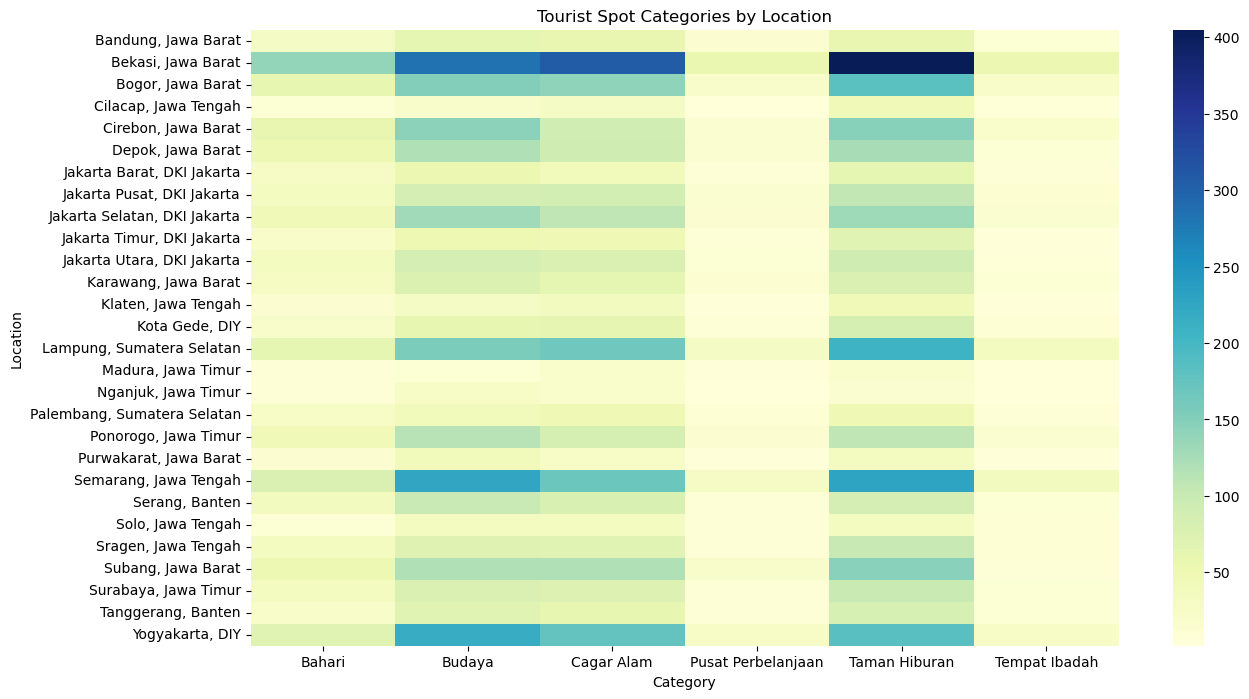

In [ ]:
# What kind of tourism each location is most famous or suitable for?
plt.figure(figsize=(14, 8))
location_category = df.groupby(['Location', 'Category']).size().unstack().fillna(0)
sns.heatmap(location_category, cmap='YlGnBu')
plt.title('Tourist Spot Categories by Location')
plt.xlabel('Category')
plt.ylabel('Location')
plt.show()

#### Observations
- Taman Hiburan is the most famous for Bekasi, Jawa Barat.Cagar Alam comes second.
- Budaya is the most famous for Semarang, Jawa Tengah. Taman Hiburan comes second
- For Lampung, Sumatera Selatan	Buday, Cagar Alam and Taman Hiburan have more or less the same value.
- Budaya is the most famous for Yogyakarta, DIY. Taman Hiburan and Cagar Alam have almost same values and comes as second and third.
- Budaya is the most famous for Cirebon, Jawa Barat

In [ ]:
# Which city would be best for a nature enthusiast to visit?
# Cagar alam.means an area of land set aside for the protection of animals.
nature_city = df[df['Category'] == 'Cagar Alam']['City'].value_counts().idxmax()
print(f"The best city for a nature enthusiast to visit is: {nature_city}")

The best city for a nature enthusiast to visit is: Bandung


In [ ]:
# figure out the spots that are most loved by the tourists.
top_rated_spots = df.groupby('Place_Name')['Rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 Most Loved Tourist Spots:")
print(top_rated_spots)

Top 10 Most Loved Tourist Spots:
Place_Name
Desa Wisata Sungai Code Jogja Kota    5.0
Wisata Kuliner Pecenongan             5.0
Freedom Library                       5.0
Kauman Pakualaman Yogyakarta          5.0
Kebun Tanaman Obat Sari Alam          4.9
Gereja Tiberias Indonesia Bandung     4.9
Masjid Nasional Al-Akbar              4.9
Masjid Daarut Tauhiid Bandung         4.9
Kawasan Malioboro                     4.8
Pulau Pelangi                         4.8
Name: Rating, dtype: float64


In [ ]:
#  Which city has the most loved tourist spots?
top_rated_cities = df.groupby('City')['Rating'].mean().sort_values(ascending=False).head()
print("Cities with Most Loved Tourist Spots:")
print(top_rated_cities)

Cities with Most Loved Tourist Spots:
City
Jakarta       4.491325
Yogyakarta    4.465976
Surabaya      4.454239
Bandung       4.426754
Semarang      4.369565
Name: Rating, dtype: float64


In [ ]:
# Which category of places are users liking the most in Indonesia?
top_rated_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(6)
print("Categories of Tourist Spots Liked the Most:")
print(top_rated_categories)

Categories of Tourist Spots Liked the Most:
Category
Tempat Ibadah         4.715707
Budaya                4.523302
Pusat Perbelanjaan    4.457218
Cagar Alam            4.403504
Taman Hiburan         4.402447
Bahari                4.368937
Name: Rating, dtype: float64


## Build a recommender model for the system

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [ ]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings')
user_item_matrix.fillna(0, inplace=True)

# Converting the user-item matrix to a sparse matrix format
user_item_sparse_matrix = csr_matrix(user_item_matrix.values)

# Computing cosine similarity between users
user_similarity = cosine_similarity(user_item_sparse_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [ ]:
# Function to get place recommendations for a given user
def get_place_recommendations(user_id, top_n=10):
    user_ratings = user_item_matrix.loc[user_id]

    # similarity scores for the user
    similar_users = user_similarity_df[user_id]

    # weighted sum of ratings from similar users
    weighted_sum = np.dot(similar_users, user_item_matrix)

    #sum of the similarity scores
    sum_of_similarities = np.array([np.abs(similar_users).sum(axis=0)]).T

    # Computing the predicted ratings
    predicted_ratings = weighted_sum / sum_of_similarities

    # Create a DataFrame for the predicted ratings
    predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.columns, columns=['Predicted_Rating'])

    # Filter out places already rated by the user
    already_rated = user_ratings[user_ratings > 0].index
    recommendations = predicted_ratings_df.drop(already_rated)

    # Sort the recommendations by the predicted rating
    recommendations = recommendations.sort_values(by='Predicted_Rating', ascending=False)

    return recommendations.head(top_n)

In [ ]:
# Example usage: get top 10 recommendations for a specific user
user_id = 36
place_recommendations = get_place_recommendations(user_id)
print(f"Top 10 recommendations for user {user_id}:")
print(place_recommendations)

Top 10 recommendations for user 36:
                                   Predicted_Rating
Place_Name                                         
Desa Wisata Gamplong                       0.417973
Gunung Lalakon                             0.389564
Masjid Agung Trans Studio Bandung          0.373407
Candi Sewu                                 0.369982
Taman Balai Kota Bandung                   0.365042
Pantai Parangtritis                        0.363453
Hutan Kota Srengseng                       0.361579
Pantai Kesirat                             0.350456
Puncak Segoro                              0.348573
Food Junction Grand Pakuwon                0.347655
